#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [235]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Task 1

In [236]:
#1.Basic Data Exploration
print("1.Number of rows and columns in the dataset:\n", df.shape)
print("2.Data type of each column:\n",df.dtypes)
print("3.Missing values in each column:\n",df.isnull().sum())

1.Number of rows and columns in the dataset:
 (148654, 13)
2.Data type of each column:
 Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
3.Missing values in each column:
 Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# Task 2

In [237]:
#2.Descriptive Statistics
basic_stats = df.describe()

# Extract specific statistics
mean_salary = basic_stats.loc['mean', 'TotalPay']
median_salary = basic_stats.loc['50%', 'TotalPay']  # 50% corresponds to median
mode_salary = df['TotalPay'].mode().iloc[0]  # Mode needs to be calculated separately
min_salary = basic_stats.loc['min', 'TotalPay']
max_salary = basic_stats.loc['max', 'TotalPay']

# Print the specific statistics
print("Mean salary:", mean_salary)
print("Median salary:", median_salary)
print("Mode:", mode_salary)
print("Minimum salary:", min_salary)
print("Maximum salary:", max_salary)

print("\nRange of salaries:", df['TotalPay'].max() - df['TotalPay'].min())

print("\nStandard deviation of salaries:", df['TotalPay'].std())

Mean salary: 74768.32197169267
Median salary: 71426.60999999999
Mode: 0.0
Minimum salary: -618.13
Maximum salary: 567595.43

Range of salaries: 568213.56

Standard deviation of salaries: 50517.005273949944


# Task 3

In [238]:
#3.Data Cleaning
df['BasePay'] = df['BasePay'].fillna(df['BasePay'].median())
df['Benefits'] = df['Benefits'].fillna(df['Benefits'].median())
df['OvertimePay'] = df['OvertimePay'].fillna(df['OvertimePay'].median())
df['OtherPay'] = df['OtherPay'].fillna(df['OtherPay'].median())
df.drop(columns=['Status','Notes'], inplace=True)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,28628.62,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,28628.62,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,28628.62,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,28628.62,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,28628.62,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,65007.45,0.00,811.27,28628.62,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,65007.45,0.00,811.27,28628.62,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,65007.45,0.00,811.27,28628.62,0.00,0.00,2014,San Francisco


## Explination:
When dealing with salary data that exhibits skewed distributions and contains zero-value entries representing salaries or other cases, using fillna() for imputation offers a pragmatic approach to handling missing values while preserving data integrity and enabling meaningful analysis.

In [239]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

# Task 4

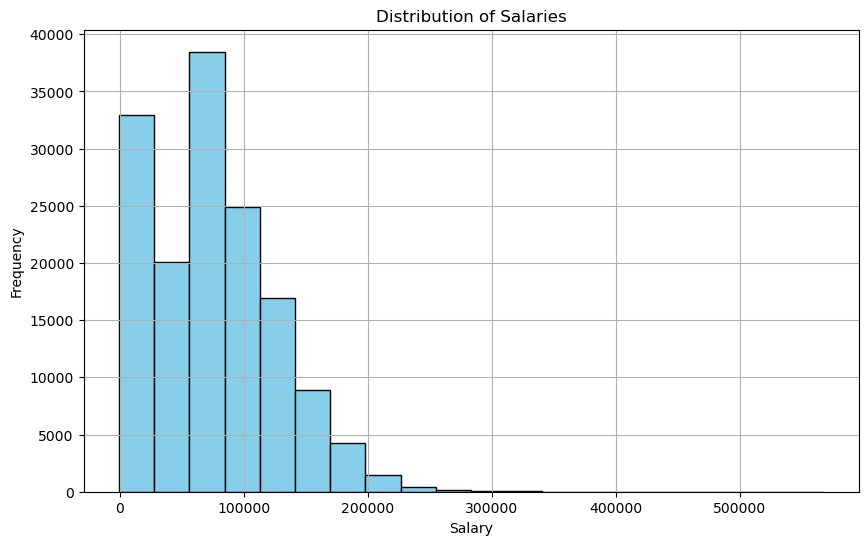

In [240]:
#4.Basic Data Visualization

# Create histograms to visualize the distribution of salaries
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPay'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.grid(True)
plt.show()

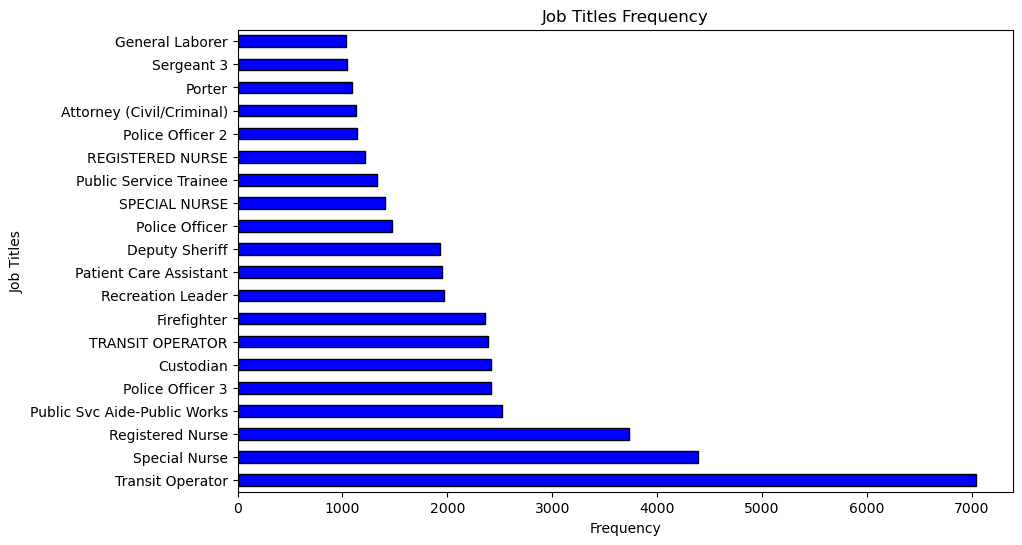

In [241]:
# Create horizontal bar chart to visualize the distribution of salaries

plt.figure(figsize=(10, 6))
df['JobTitle'].value_counts()[:20].plot(kind='barh', color='blue', edgecolor='black')
plt.title('Job Titles Frequency')
plt.xlabel('Frequency')
plt.ylabel('Job Titles')
plt.show()

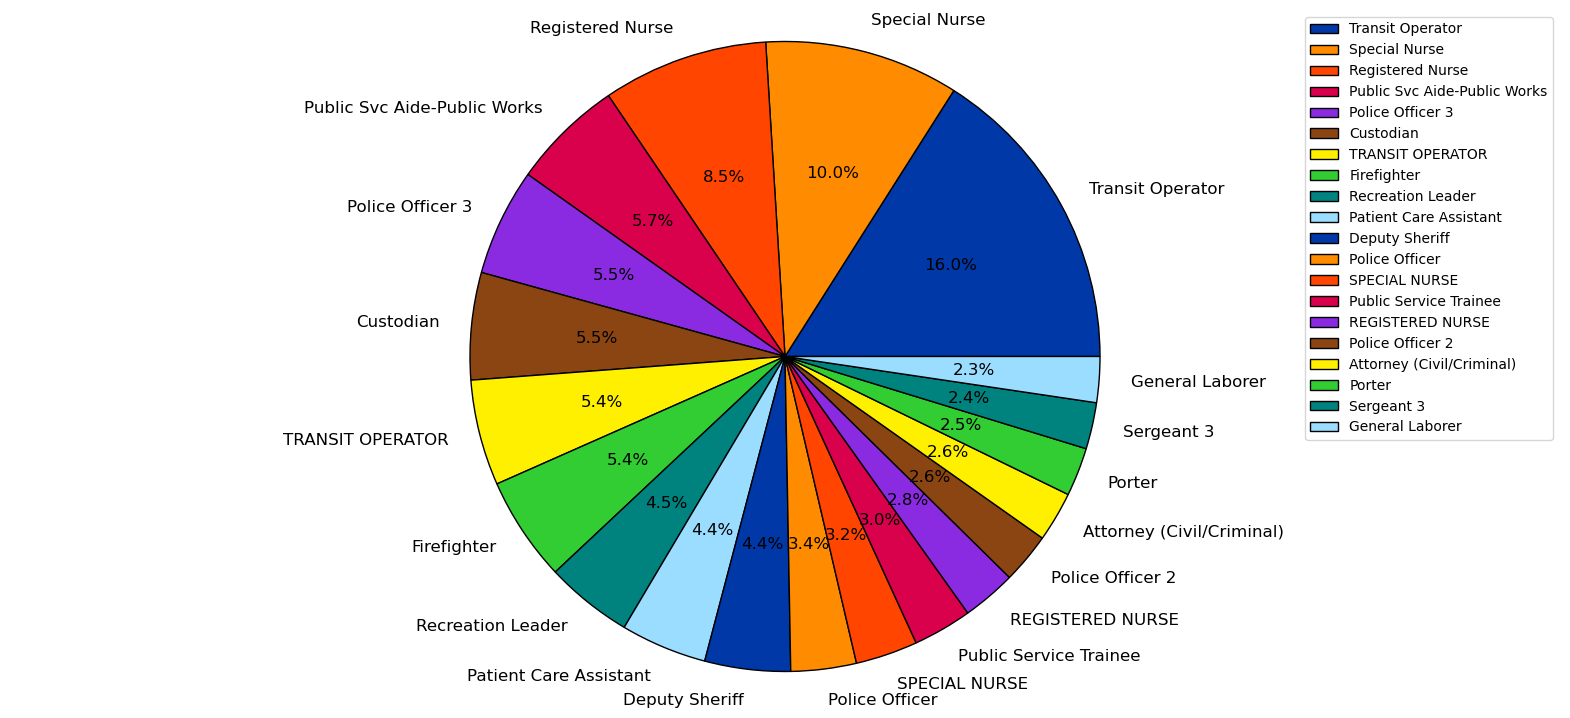

In [242]:
# Create a pie chart to represent the proportion of employees in different departments

plt.figure(figsize=(20, 9))

counts = df["JobTitle"].value_counts()[:20]

colors = ['#0038a8', '#ff8c00', '#ff4500', '#d9004c', '#8a2be2', '#8b4513', '#fff000', '#32cd32', '#00827f', '#9bddff']

counts.plot(kind='pie', fontsize=12, colors=colors, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.ylabel("")
plt.legend(labels=counts.index, loc="best") 
plt.show()



In [243]:
average_salaries_by_Title = df.groupby('JobTitle')['TotalPay'].agg('mean')
average_salaries_by_Title.head()

JobTitle
ACCOUNT CLERK                  44035.664337
ACCOUNTANT                     47429.268000
ACCOUNTANT INTERN              29031.742917
ACPO,JuvP, Juv Prob (SFERS)    62290.780000
ACUPUNCTURIST                  67594.400000
Name: TotalPay, dtype: float64

# Task 5

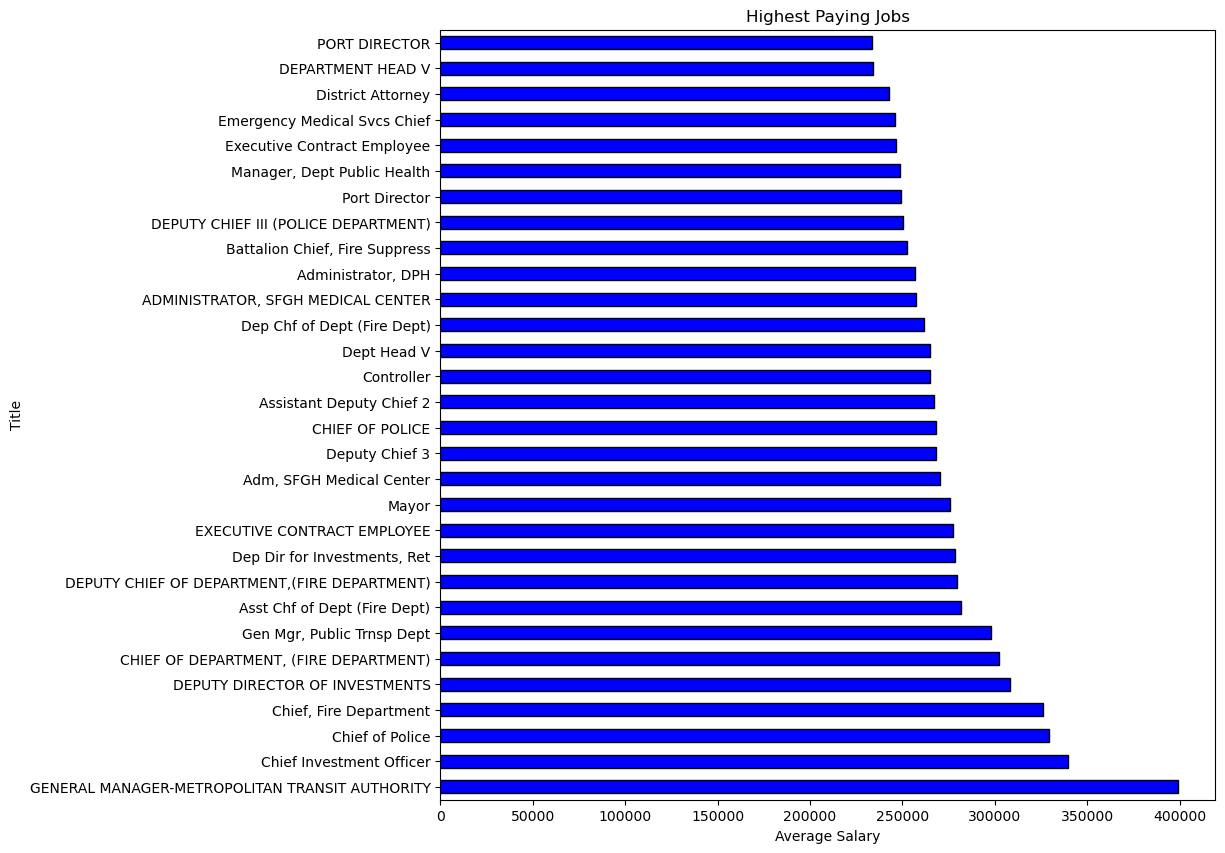

In [244]:
plt.figure(figsize=(10, 10))

# Sort the average salaries in descending order and select the top 30
average_salaries_by_Title_sorted = average_salaries_by_Title.sort_values(ascending=False)[:30]

# Create a horizontal bar plot
average_salaries_by_Title_sorted.plot(kind='barh', color='blue', edgecolor='black')

plt.title('Highest Paying Jobs')
plt.xlabel('Average Salary')
plt.ylabel('Title')
plt.show()


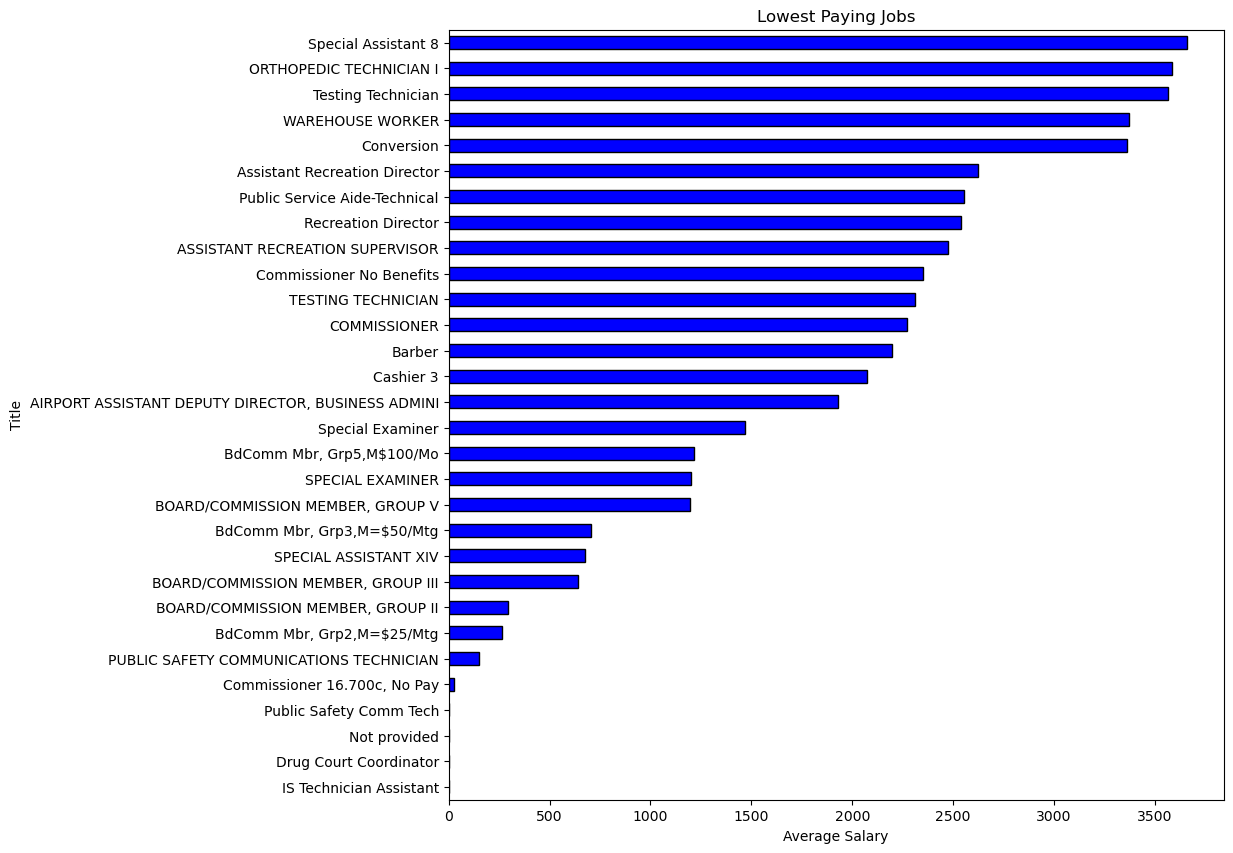

In [245]:
plt.figure(figsize=(10, 10))

# Sort the average salaries in ascending order and select the top 30
average_salaries_by_Title_sorted = average_salaries_by_Title.sort_values()[:30]

# Create a horizontal bar plot
average_salaries_by_Title_sorted.plot(kind='barh', color='blue', edgecolor='black')

plt.title('Lowest Paying Jobs')
plt.xlabel('Average Salary')
plt.ylabel('Title')
plt.show()


# Task 6

In [246]:
# 6. Simple Correlation Analysis
correlation = df['TotalPay'].corr(df['BasePay'])
print("Correlation coefficient between salary and base pay:", correlation)

Correlation coefficient between salary and base pay: 0.9506887197970232


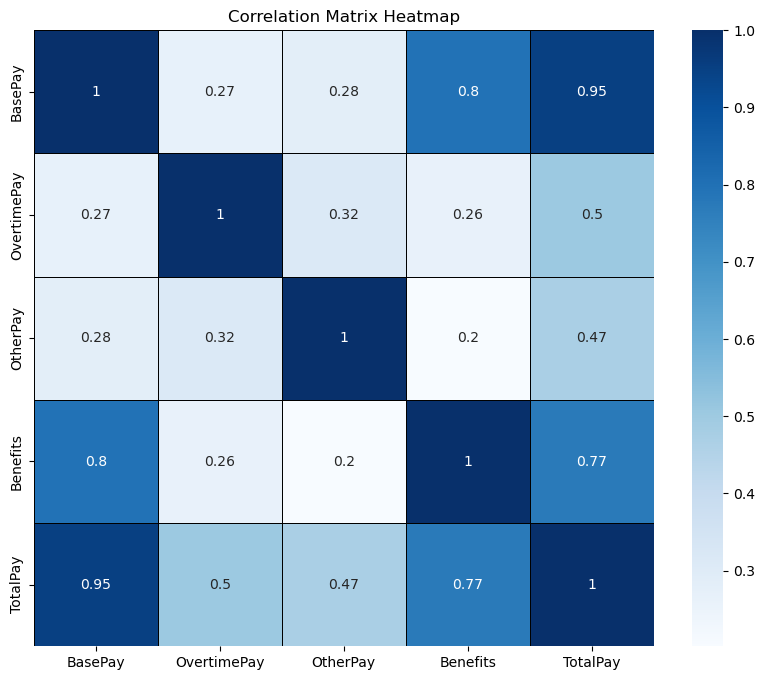

In [247]:
correlation_matrix = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay']].corr()

plt.figure(figsize=(10, 8))

# Plot the heatmap with seaborn using the "Blues" colormap
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, linecolor='black')

plt.title('Correlation Matrix Heatmap')
plt.show()




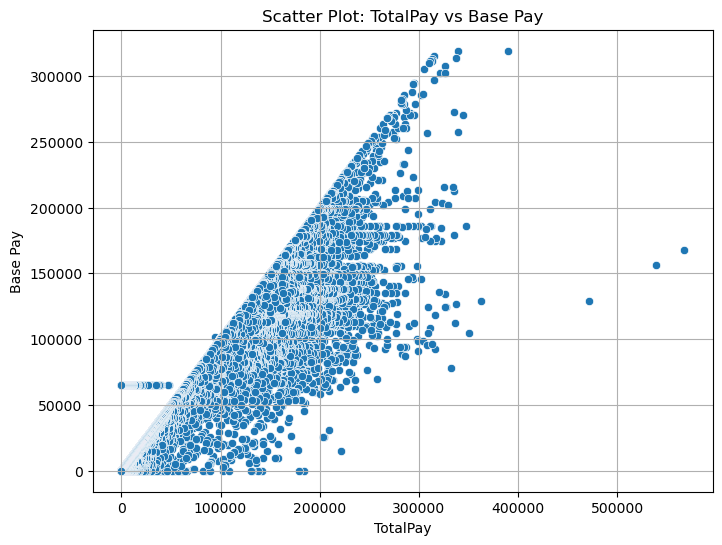

In [248]:
# Plot a scatter plot to visualize the relationship between 'TotalPay' and 'BasePay'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TotalPay', y='BasePay')
plt.title('Scatter Plot: TotalPay vs Base Pay')
plt.xlabel('TotalPay')
plt.ylabel('Base Pay')
plt.grid(True)
plt.show()

# Task 7

**1. Highest Paying Jobs:** include CEO positions, which typically command high salaries due to the significant responsibilities and leadership roles involved.

**2. Lowest Paying Jobs:** The lowest-paying jobs identified include Drug Court Coordinator, IS Technician Assistant, and Public Safety Comm Tech. These roles may involve specialized but lower-skilled tasks, leading to comparatively lower salaries.

**3. Most Common Jobs:** The most common jobs observed are Transit Operator, Special Nurse, and Registered Nurse. These positions may be in high demand within the organization or industry, leading to a larger number of individuals occupying these roles.

**4. Influential Factors on Income:** Base Pay and Benefits emerge as the most influential factors affecting high or low income. Base Pay represents the core salary component, while Benefits may include additional perks such as health insurance, retirement contributions, and other employee benefits. These factors significantly impact overall compensation levels for employees.

# Good Luck!